In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'C:\Users\jlod9\OneDrive\Desktop\AI__Projects\Data_Science_with_Python\Projects\311_Service_Requests_from_2010_to_Present.csv')

In [3]:
df.head(3)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 53 columns):
Unique Key                        300698 non-null int64
Created Date                      300698 non-null object
Closed Date                       298534 non-null object
Agency                            300698 non-null object
Agency Name                       300698 non-null object
Complaint Type                    300698 non-null object
Descriptor                        294784 non-null object
Location Type                     300567 non-null object
Incident Zip                      298083 non-null float64
Incident Address                  256288 non-null object
Street Name                       256288 non-null object
Cross Street 1                    251419 non-null object
Cross Street 2                    250919 non-null object
Intersection Street 1             43858 non-null object
Intersection Street 2             43362 non-null object
Address Type                      29

---
2. Read or convert the columns **‘Created Date’ and Closed Date’** to datetime datatype and create a new column **‘Request_Closing_Time’** as the time elapsed between request creation and request closing. (Hint: Explore the package/module datetime)

In [5]:
df['Created Date'] = pd.to_datetime(df['Created Date'])
df['Closed Date'] = pd.to_datetime(df['Closed Date'])
df['Request_Closing_Time'] = df['Closed Date'] - df['Created Date']

In [6]:
df['Request_Closing_Time'] = df['Request_Closing_Time'].dt.seconds

---
4. Order the complaint types based on the average **‘Request_Closing_Time’**, grouping them for different locations.

In [7]:
print('No. of locations :',len(df['Location Type'].value_counts()))

No. of locations : 18


In [8]:
request_closing_time = df[['Location Type','Request_Closing_Time']].groupby(
    by='Location Type').mean().sort_values(by='Request_Closing_Time')
request_closing_time

,Request_Closing_Time
Location Type,
Park,3005.000000
Subway Station,8535.058824
Club/Bar/Restaurant,10502.429268
House of Worship,10671.161812
Roadway Tunnel,11054.400000
Store/Commercial,11371.644751
Park/Playground,11882.658388
Highway,12194.238318
Bridge,13749.500000


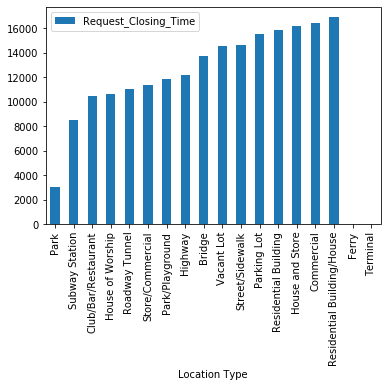

In [9]:
request_closing_time.plot(kind='bar')

### Hypothesis testing
a) Whether the average response time across complaint types is similar or not (overall)

In [10]:
complaint_response_time = df[['Complaint Type','Request_Closing_Time']].groupby(
    by='Complaint Type')
complaint_response_time_mean = complaint_response_time.mean()

In [11]:
complaint_response_time_mean.T

Complaint Type,Agency Issues,Animal Abuse,Animal in a Park,Bike/Roller/Skate Chronic,Blocked Driveway,Derelict Vehicle,Disorderly Youth,Drinking,Ferry Complaint,Graffiti,...,Noise - House of Worship,Noise - Park,Noise - Street/Sidewalk,Noise - Vehicle,Panhandling,Posting Advertisement,Squeegee,Traffic,Urinating in Public,Vending
Request_Closing_Time,18937.166667,16654.392508,3005.0,12744.169811,15784.925609,20119.817887,12508.804196,13021.657255,NaN,20392.292035,...,10658.844995,11720.108901,11597.681463,12154.427817,13475.734426,6979.558642,14564.25,11512.049155,12326.261824,13698.802899


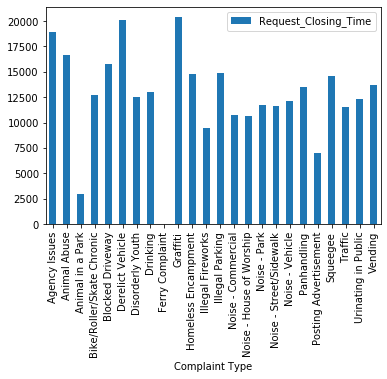

In [12]:
complaint_response_time_mean.plot(kind='bar')

In [13]:
complaint_type = complaint_response_time_mean.index

In [14]:
complaint_response_time.get_group(complaint_type[1])

,Complaint Type,Request_Closing_Time
89,Animal Abuse,1570.0
140,Animal Abuse,4206.0
164,Animal Abuse,8095.0
189,Animal Abuse,9568.0
247,Animal Abuse,4262.0
...,...,...
300418,Animal Abuse,4183.0
300458,Animal Abuse,4925.0
300483,Animal Abuse,2572.0
300486,Animal Abuse,27944.0


#### ANOVA
- $H_0$ : average response time across complaints are equal
- $H_A$ : average response time across complaints are not equal

---

- SST = sum of square total
- SSW = sum of square within
- SSB = sum of square between

#### SST

In [15]:
complaint_response_time_mean.fillna(0).values.flatten()
total_mean_closing_time = df['Request_Closing_Time'].mean()
print('Mean closing time of all request = {:.2f} seconds'.format(total_mean_closing_time))

Mean closing time of all request = 14145.83 seconds


In [16]:
complete_data = df['Request_Closing_Time']

In [17]:
SST = np.sum(np.square(complete_data - complete_data.mean()))
print('Sum of Square Total =',SST)

Sum of Square Total = 57656030157151.586


#### SSW

In [18]:
def sum_of_square(group):
    
    return np.sum(np.square(group - group.mean()))

In [19]:
ssw_values = []
dof = []
for i in range(len(complaint_type)):
    com = complaint_type[i]
    #print('Complaint Type =',com,end='\t\t\t')
    group_details = complaint_response_time.get_group(com)['Request_Closing_Time']
    dof.append(len(group_details)-1)
    #print(dof)
    value = sum_of_square(group_details)
    ssw_values.append(value)
    #print('SSW: ',value)
    
SSW = sum(ssw_values)
dof_ssw = sum(dof)
print('Sum of Square Within =',SSW)
print('Degree of Freedom =', dof_ssw)

Sum of Square Within = 55831665091636.44
Degree of Freedom = 300674


#### SSB

In [20]:
SSB = SST - SSW
SSB

1824365065515.1484

In [21]:
dof_ssb = len(complaint_type) - 1
print('Degree of Freedom =',dof_ssb)

Degree of Freedom = 23


# $F_{statistics} = \frac{(SSB / dof_{ssb})}{(SSW/dof_{ssw})}$

In [22]:
Fstats = (SSB / dof_ssb)/(SSW/dof_ssw)
print('Fstatistis = ',Fstats)
print('SSB dof =',dof_ssb)
print('SSW dof =',dof_ssw)

Fstatistis =  427.16848693719123
SSB dof = 23
SSW dof = 300674


In [23]:
from scipy import stats

In [24]:
fdist = stats.f

In [25]:
fdist.cdf(Fstats,dof_ssb,dof_ssw)

0.9999999999999999

Since p-value falls in the critical region hece reject the null hypothesis and states that

**AVERAGE RESPONSE TIME ACROSS THE CUSTOMERS ARE NOT EQUAL**

### Hypothesis testing
b) Are the type of complaint or service requested and location related?

In [26]:
df['Location Type'].value_counts().head(3)

Street/Sidewalk        249299
Store/Commercial        20381
Club/Bar/Restaurant     17360
Name: Location Type, dtype: int64

In [27]:
df['Complaint Type'].value_counts().head(2)

Blocked Driveway    77044
Illegal Parking     75361
Name: Complaint Type, dtype: int64

In [28]:
group = df[['Unique Key','Location Type','Complaint Type']].groupby(by=['Location Type','Complaint Type'])

In [29]:
group_count = group.count()

In [30]:
group_un = group_count.unstack()#.reset_index()

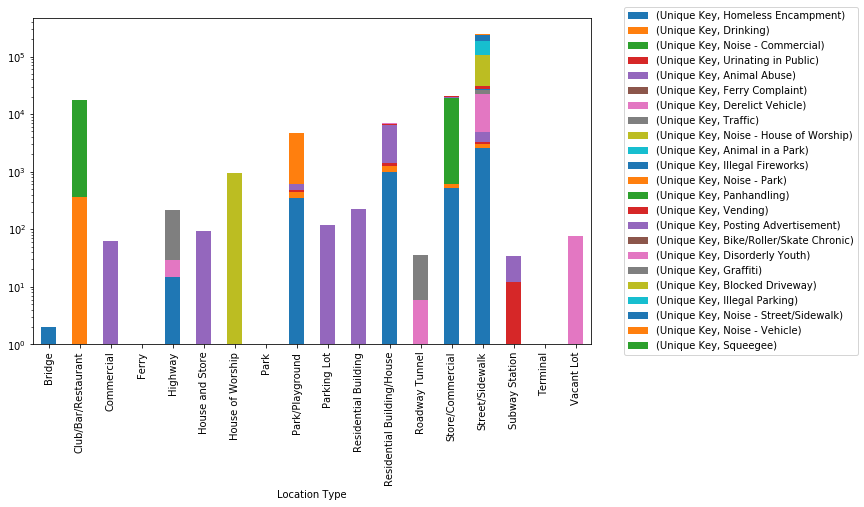

In [31]:
fig,ax = plt.subplots(figsize=(10,6))
fig= group_un.plot(kind='bar',stacked=True,ax=ax)
fig.legend(bbox_to_anchor=[1.05,1.05])
plt.yscale('log')

### Contegency Table
- Pivot table, cross

In [32]:
group_un

Unique Key                              \
Complaint Type             Homeless Encampment Drinking Noise - Commercial   
Location Type                                                                
Bridge                                     2.0      NaN                NaN   
Club/Bar/Restaurant                        NaN    366.0            16973.0   
Commercial                                 NaN      NaN                NaN   
Ferry                                      NaN      NaN                NaN   
Highway                                   15.0      NaN                NaN   
House and Store                            NaN      NaN                NaN   
House of Worship                           NaN      NaN                NaN   
Park                                       NaN      NaN                NaN   
Park/Playground                          353.0     98.0                NaN   
Parking Lot                                NaN      NaN                NaN   
Residential Building                       NaN      NaN                NaN   
Residential Building/House               983.0    291.0                NaN   
Roadway Tunnel                             1.0      NaN                NaN   
Store/Commercial                         512.0     90.0            18598.0   
Street/Sidewalk                         2541.0    434.0                NaN   
Subway Station                             NaN      NaN                NaN   
Terminal                                   NaN      NaN                NaN   
Vacant Lot                                 NaN      NaN                NaN   

                                                                             \
Complaint Type             Urinating in Public Animal Abuse Ferry Complaint   
Location Type                                                                 
Bridge                                     NaN          NaN             NaN   
Club/Bar/Restaurant                       21.0          NaN             NaN   
Commercial                                 NaN         62.0             NaN   
Ferry                                      NaN          NaN             1.0   
Highway                                    NaN          NaN             NaN   
House and Store                            NaN         93.0             NaN   
House of Worship                           NaN          NaN             NaN   
Park                                       NaN          NaN             NaN   
Park/Playground                           38.0        123.0             NaN   
Parking Lot                                NaN        110.0             NaN   
Residential Building                       NaN        227.0             NaN   
Residential Building/House               138.0       5085.0             NaN   
Roadway Tunnel                             NaN          NaN             NaN   
Store/Commercial                          66.0        522.0             NaN   
Street/Sidewalk                          316.0       1531.0             NaN   
Subway Station                            12.0         22.0             NaN   
Terminal                                   NaN          NaN             1.0   
Vacant Lot                                 NaN          NaN             NaN   

                                                                              \
Complaint Type             Derelict Vehicle Traffic Noise - House of Worship   
Location Type                                                                  
Bridge                                  NaN     NaN                      NaN   
Club/Bar/Restaurant                     NaN     NaN                      NaN   
Commercial                              NaN     NaN                      NaN   
Ferry                                   NaN     NaN                      NaN   
Highway                                14.0   186.0                      NaN   
House and Store                         NaN     NaN                      NaN   
House of Worship 

In [33]:
comp_loc = group_un.fillna(value=0)

In [34]:
comp_loc

Unique Key                              \
Complaint Type             Homeless Encampment Drinking Noise - Commercial   
Location Type                                                                
Bridge                                     2.0      0.0                0.0   
Club/Bar/Restaurant                        0.0    366.0            16973.0   
Commercial                                 0.0      0.0                0.0   
Ferry                                      0.0      0.0                0.0   
Highway                                   15.0      0.0                0.0   
House and Store                            0.0      0.0                0.0   
House of Worship                           0.0      0.0                0.0   
Park                                       0.0      0.0                0.0   
Park/Playground                          353.0     98.0                0.0   
Parking Lot                                0.0      0.0                0.0   
Residential Building                       0.0      0.0                0.0   
Residential Building/House               983.0    291.0                0.0   
Roadway Tunnel                             1.0      0.0                0.0   
Store/Commercial                         512.0     90.0            18598.0   
Street/Sidewalk                         2541.0    434.0                0.0   
Subway Station                             0.0      0.0                0.0   
Terminal                                   0.0      0.0                0.0   
Vacant Lot                                 0.0      0.0                0.0   

                                                                             \
Complaint Type             Urinating in Public Animal Abuse Ferry Complaint   
Location Type                                                                 
Bridge                                     0.0          0.0             0.0   
Club/Bar/Restaurant                       21.0          0.0             0.0   
Commercial                                 0.0         62.0             0.0   
Ferry                                      0.0          0.0             1.0   
Highway                                    0.0          0.0             0.0   
House and Store                            0.0         93.0             0.0   
House of Worship                           0.0          0.0             0.0   
Park                                       0.0          0.0             0.0   
Park/Playground                           38.0        123.0             0.0   
Parking Lot                                0.0        110.0             0.0   
Residential Building                       0.0        227.0             0.0   
Residential Building/House               138.0       5085.0             0.0   
Roadway Tunnel                             0.0          0.0             0.0   
Store/Commercial                          66.0        522.0             0.0   
Street/Sidewalk                          316.0       1531.0             0.0   
Subway Station                            12.0         22.0             0.0   
Terminal                                   0.0          0.0             1.0   
Vacant Lot                                 0.0          0.0             0.0   

                                                                              \
Complaint Type             Derelict Vehicle Traffic Noise - House of Worship   
Location Type                                                                  
Bridge                                  0.0     0.0                      0.0   
Club/Bar/Restaurant                     0.0     0.0                      0.0   
Commercial                              0.0     0.0                      0.0   
Ferry                                   0.0     0.0                      0.0   
Highway                                14.0   186.0                      0.0   
House and Store                         0.0     0.0                      0.0   
House of Worship 

if they are related what should be case ?
    - there are speicific kind of complaints related to located
    - assocation

if they are not relted what should be case ?
    - complaints are not depends on location
    - independent
    
- HO: No Related (no association)
    - alpha > 0.05
- HA: Realted (association)
    - alpha < 0.05

## $ChiSquare = \frac{\sum (f_e - f_o)^2} { f_e} $

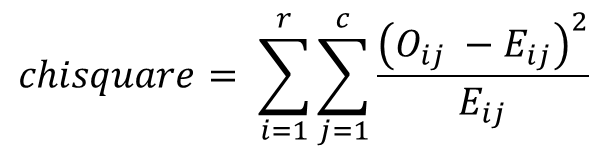

In [35]:
total_loc = comp_loc.sum(axis=0)
comp_loc.loc['Total_loc'] = total_loc

In [36]:
total_comp = comp_loc.sum(axis=1)
comp_loc['Total_comp'] = total_comp

In [37]:
comp_loc

Unique Key                              \
Complaint Type             Homeless Encampment Drinking Noise - Commercial   
Location Type                                                                
Bridge                                     2.0      0.0                0.0   
Club/Bar/Restaurant                        0.0    366.0            16973.0   
Commercial                                 0.0      0.0                0.0   
Ferry                                      0.0      0.0                0.0   
Highway                                   15.0      0.0                0.0   
House and Store                            0.0      0.0                0.0   
House of Worship                           0.0      0.0                0.0   
Park                                       0.0      0.0                0.0   
Park/Playground                          353.0     98.0                0.0   
Parking Lot                                0.0      0.0                0.0   
Residential Building                       0.0      0.0                0.0   
Residential Building/House               983.0    291.0                0.0   
Roadway Tunnel                             1.0      0.0                0.0   
Store/Commercial                         512.0     90.0            18598.0   
Street/Sidewalk                         2541.0    434.0                0.0   
Subway Station                             0.0      0.0                0.0   
Terminal                                   0.0      0.0                0.0   
Vacant Lot                                 0.0      0.0                0.0   
Total_loc                               4407.0   1279.0            35571.0   

                                                                             \
Complaint Type             Urinating in Public Animal Abuse Ferry Complaint   
Location Type                                                                 
Bridge                                     0.0          0.0             0.0   
Club/Bar/Restaurant                       21.0          0.0             0.0   
Commercial                                 0.0         62.0             0.0   
Ferry                                      0.0          0.0             1.0   
Highway                                    0.0          0.0             0.0   
House and Store                            0.0         93.0             0.0   
House of Worship                           0.0          0.0             0.0   
Park                                       0.0          0.0             0.0   
Park/Playground                           38.0        123.0             0.0   
Parking Lot                                0.0        110.0             0.0   
Residential Building                       0.0        227.0             0.0   
Residential Building/House               138.0       5085.0             0.0   
Roadway Tunnel                             0.0          0.0             0.0   
Store/Commercial                          66.0        522.0             0.0   
Street/Sidewalk                          316.0       1531.0             0.0   
Subway Station                            12.0         22.0             0.0   
Terminal                                   0.0          0.0             1.0   
Vacant Lot                                 0.0          0.0             0.0   
Total_loc                                591.0       7775.0             2.0   

                                                                              \
Complaint Type             Derelict Vehicle Traffic Noise - House of Worship   
Location Type                                                                  
Bridge                                  0.0     0.0                      0.0   
Club/Bar/Restaurant                     0.0     0.0                      0.0   
Commercial                              0.0     0.0                      0.0   
Ferry                                   0.0     0.0                      0.0   
Highway             

In [38]:
#'Location Type','Complaint Type'
#comp_loc = pd.crosstab(df['Location Type'],df['Complaint Type'],margins=True)

### Expected table

In [39]:
N = comp_loc.iloc[-1,-1]
N

300567.0

In [40]:
rows,cols  = comp_loc.shape
rows,cols

(19, 24)

In [41]:
E_ij =np.zeros((rows-1,cols-1))
for i in range(cols-1):
    for j in range(rows-1):
        e = (comp_loc.iloc[-1,i] * comp_loc.iloc[j,-1])/N
        print('For {} row and {} col the e ={}'.format(j,i,e))
        E_ij[j,i] = e

For 0 row and 0 col the e =0.029324576550319895
For 1 row and 0 col the e =254.5373244567767
For 2 row and 0 col the e =0.9090618730599167
For 3 row and 0 col the e =0.014662288275159948
For 4 row and 0 col the e =3.152391979159389
For 5 row and 0 col the e =1.363592809589875
For 6 row and 0 col the e =13.621265807623592
For 7 row and 0 col the e =0.014662288275159948
For 8 row and 0 col the e =69.98310193733843
For 9 row and 0 col the e =1.715487728193714
For 10 row and 0 col the e =3.3283394384613083
For 11 row and 0 col the e =102.04952639511323
For 12 row and 0 col the e =0.5131800896305981
For 13 row and 0 col the e =298.8320973360349
For 14 row and 0 col the e =3655.2938047090997
For 15 row and 0 col the e =0.4985178013554382
For 16 row and 0 col the e =0.014662288275159948
For 17 row and 0 col the e =1.128996197187316
For 0 row and 1 col the e =0.00851058166731544
For 1 row and 1 col the e =73.87184887229802
For 2 row and 1 col the e =0.26382803168677865
For 3 row and 1 col the 

In [54]:
E_ij

array([[2.93245766e-02, 8.51058167e-03, 2.36692651e-01, 3.93256745e-03,
        5.17355531e-02, 1.33081809e-05, 1.17843942e-01, 2.98968283e-02,
        6.18165001e-03, 6.65409044e-06, 1.11788719e-03, 2.68891795e-02,
        2.04280576e-03, 2.52855437e-02, 4.31850469e-03, 2.84129662e-03,
        1.90306986e-03, 7.51912219e-04, 5.12411542e-01, 5.01226016e-01,
        3.23395449e-01, 1.13651865e-01, 2.66163617e-05],
       [2.54537324e+02, 7.38718489e+01, 2.05449221e+03, 3.41346854e+01,
        4.49064601e+02, 1.15515010e-01, 1.02288541e+03, 2.59504470e+02,
        5.36567221e+01, 5.77575050e-02, 9.70326084e+00, 2.33398078e+02,
        1.77315540e+01, 2.19478519e+02, 3.74846207e+01, 2.46624546e+01,
        1.65186464e+01, 6.52659806e+00, 4.44773219e+03, 4.35064182e+03,
        2.80707250e+03, 9.86498185e+02, 2.31030020e-01],
       [9.09061873e-01, 2.63828032e-01, 7.33747218e+00, 1.21909591e-01,
        1.60380215e+00, 4.12553607e-04, 3.65316219e+00, 9.26801678e-01,
        1.91631150e-01

In [43]:
# E_ij
O_ij =  comp_loc.iloc[:-1,:-1].values

In [44]:
O_ij.shape, E_ij.shape

((18, 23), (18, 23))

In [45]:
def chisquare_value(fe,fo):
    chisqure = np.square(fe-fo)/fe
    return chisqure

In [46]:
chisqure_list = []
n_row,n_col = O_ij.shape
for i in range(n_row):
    for j in range(n_col):
        chisqure_list.append(
            chisquare_value(E_ij[i,j], O_ij[i,j]))

In [47]:
chisquare_value = sum(chisqure_list)
print('chisquare_value =',chisquare_value)

chisquare_value = 1638407.580569628


In [48]:
dof = (n_row-1)*(n_col-1)
print('Degree of Freedom =',dof)

Degree of Freedom = 374


In [49]:
from scipy import stats

In [50]:
alpha = stats.chi2.cdf(1638407.580569628,374)# p value from the right 

In [51]:
pval        ## ME i think this is means to be alpha?

NameError: name 'pval' is not defined

In [55]:
print('the alpha =',alpha)

the alpha = 1.0


### since alpha is less than 0.05 hence , complaint or service requested and location related

---